In [122]:
import pandas as pd
import numpy as np

In [123]:
df = pd.read_csv('../data/processed/training.1600000.processed.noemoticon.csv', encoding='latin',header = None)

In [124]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1600000 non-null  int64 
 1   1       1600000 non-null  int64 
 2   2       1600000 non-null  object
 3   3       1600000 non-null  object
 4   4       1600000 non-null  object
 5   5       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


## Adicionaar cabeçalhos das colunas no DataFrame

In [126]:
df.columns = ['target','ids','Date','flag','user','text']

In [127]:
len(df)

1600000

##Cria método para limpar os texto do DataFrame
Limpar URL
Limpar Mensões
Limpar Hashtags


In [128]:
import re
def cleaned_text(text):
    # eliminating urls
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',text)
    # eliminating mentions
    text = re.sub('@[^\s]+',' ', text)
    # eliminating 
    text = re.sub('[\s]+', ' ', text)
    # eliminating hashtags
    text = re.sub(r'#([^\s]+)', r' ', text)
    return text

##Criar coluna com os dados limpos

In [129]:
df['tidy_tweet'] = df.text.apply(cleaned_text)

In [130]:
df

,target,ids,Date,flag,user,text,tidy_tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","- Awww, that's a bummer. You shoulda got Davi..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to s...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am..."
...,...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,Happy 38th Birthday to my boo of alll time!!! ...


In [131]:
df.loc[df['target'] == 4, 'target'] = 1

In [132]:
print(df.target.value_counts())

1    800000
0    800000
Name: target, dtype: int64


##  Remover  Colunas que não serão usadas

In [133]:
# dropping columns
df = df.drop(columns = ['ids','Date','flag','user'])

##Instala o NLTK 

In [134]:
!pip install nltk

### Remover StopWords dos textos
- Awww, that's a bummer. You shoulda got Davi...
- awww bummer shoulda got david carr third day

In [135]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

StopWords = set(stopwords.words('english'))
def text_cleaner(text):
    text = text.str.replace('[^a-zA-Z#]',' ')
    text = text.str.lower()
    text = text.apply(lambda x: ' '.join(w for w in x.split() if w not in StopWords))
    return text
df['tidy_tweet'] = text_cleaner(df['tidy_tweet'])
print(df)        

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/felipe.carneiro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


         target                                               text  \
0             0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1             0  is upset that he can't update his Facebook by ...   
2             0  @Kenichan I dived many times for the ball. Man...   
3             0    my whole body feels itchy and like its on fire    
4             0  @nationwideclass no, it's not behaving at all....   
...         ...                                                ...   
1599995       1  Just woke up. Having no school is the best fee...   
1599996       1  TheWDB.com - Very cool to hear old Walt interv...   
1599997       1  Are you ready for your MoJo Makeover? Ask me f...   
1599998       1  Happy 38th Birthday to my boo of alll time!!! ...   
1599999       1  happy #charitytuesday @theNSPCC @SparksCharity...   

                                                tidy_tweet  
0             awww bummer shoulda got david carr third day  
1        upset update facebook textin

Tokenizen 

In [136]:
tokenized_tweet = df['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [awww, bummer, shoulda, got, david, carr, thir...
1    [upset, update, facebook, texting, might, cry,...
2    [dived, many, times, ball, managed, save, rest...
3              [whole, body, feels, itchy, like, fire]
4                                 [behaving, mad, see]
Name: tidy_tweet, dtype: object

In [137]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [awww, bummer, shoulda, got, david, carr, thir...
1    [upset, updat, facebook, text, might, cri, res...
2    [dive, mani, time, ball, manag, save, rest, go...
3               [whole, bodi, feel, itchi, like, fire]
4                                    [behav, mad, see]
Name: tidy_tweet, dtype: object

In [138]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

df['tidy_tweet'] = tokenized_tweet

In [89]:
!pip install WordCloud

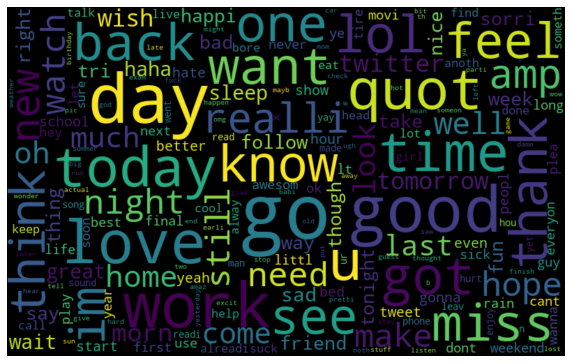

In [90]:
import matplotlib.pyplot as plt
all_words = ' '.join([text for text in df['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, collocations=False).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

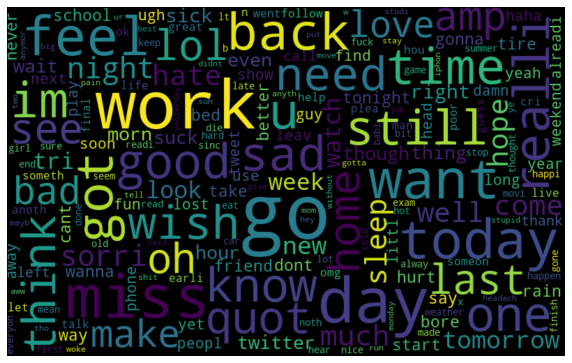

In [91]:
all_words = ' '.join([text for text in df['tidy_tweet'][df['target'] == 0]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, collocations=False).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

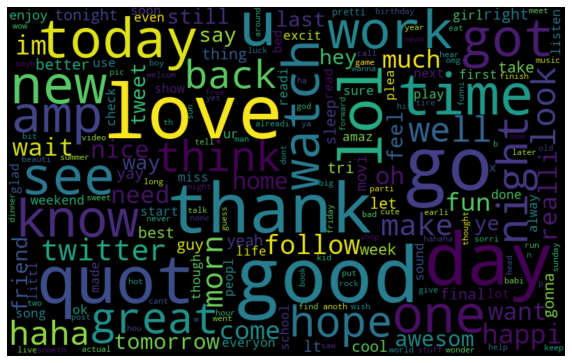

In [92]:
all_words = ' '.join([text for text in df['tidy_tweet'][df['target'] == 1]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, collocations=False).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [93]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [94]:
HT_negative = hashtag_extract(df['text'][df['target'] == 0])
HT_positive = hashtag_extract(df['text'][df['target'] == 1])

In [96]:
HT_positive = sum(HT_positive,[])
HT_negative = sum(HT_negative,[])

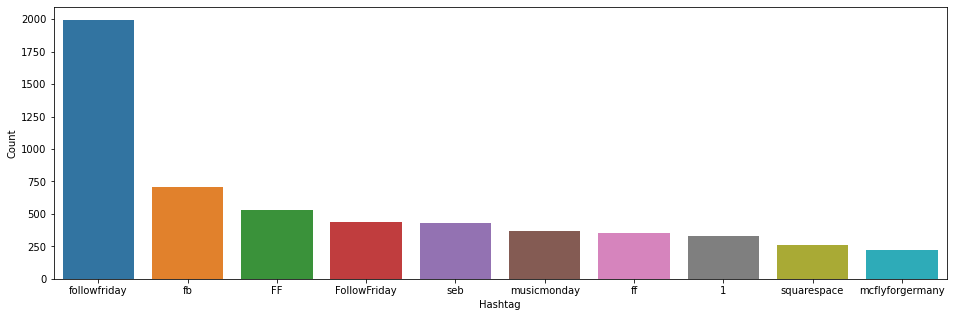

In [97]:
import nltk
import seaborn as sns
a = nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

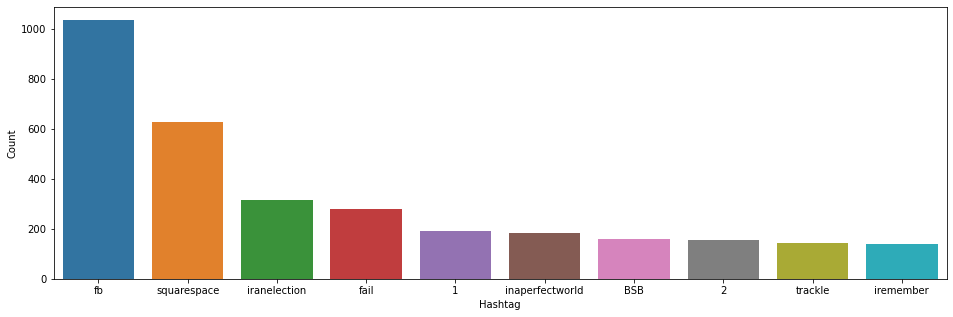

In [98]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [99]:
nltk.FreqDist(tokenized_tweet)

FreqDist({'': 8764, 'thank': 4334, 'get follow day use add everyon train pay vip': 1484, 'good morn': 1173, 'miss': 1124, 'work': 1122, 'welcom': 962, 'know': 816, 'love': 780, 'ye': 561, ...})

In [139]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#BOW_CV= CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
BOW_CV= TfidfVectorizer(max_df=0.95, min_df=1, max_features=2000, stop_words='english')
# bag-of-words feature matrix
bow = BOW_CV.fit_transform(df['tidy_tweet'])

In [140]:
sparse_matrix =  pd.DataFrame.sparse.from_spmatrix(bow, columns=BOW_CV.get_feature_names())

In [141]:
sparse_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Columns: 2000 entries, abl to zoo
dtypes: Sparse[float64, 0](2000)
memory usage: 86.6 MB


In [142]:
sparse_matrix.shape

(1600000, 2000)

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


In [144]:
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(bow, df['target'], random_state=42, test_size=0.3)


In [145]:
import mlflow

In [152]:
mlflow.set_tracking_uri('http://localhost:5000')

In [153]:
mlflow.set_experiment('sentiment_analysis')
mlflow.sklearn.autolog(log_models=True)

In [154]:
with mlflow.start_run() as run:
    lreg = LogisticRegression()
    lreg.fit(xtrain_bow, ytrain) # training the model
    prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
    prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
    prediction_int = prediction_int.astype(np.int)
    accuracy = lreg.score(xvalid_bow, yvalid)
    mlflow.sklearn.log_model(lreg,'lreg')
    class_report = classification_report(yvalid, prediction_int)

/Users/felipe.carneiro/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2021/07/11 21:57:20 WARNING mlflow.sklearn: Failed to infer model signature: Expected one of (pandas.DataFrame, numpy array, dictionary of (name -> numpy.ndarray), pyspark.sql.DataFrame) but got '<class 'scipy.sparse.csr.csr_matrix'>'


In [149]:
lreg.score(xvalid_bow, yvalid)

0.7541395833333333

In [150]:
print(class_report)

              precision    recall  f1-score   support

           0       0.86      0.51      0.64    239361
           1       0.65      0.92      0.76    240639

    accuracy                           0.71    480000
   macro avg       0.76      0.71      0.70    480000
weighted avg       0.76      0.71      0.70    480000



In [ ]:
lreg.predict_proba(xtrain_bow)

In [ ]:
#def getTextSentiment(text):
#  newBW = BOW_CV.transform([text])
#  proba = lreg.predict_proba(newBW)
#  return proba

In [ ]:
#import pickle
#pickle.dump(lreg, open('logistic_regression.pkl','wb'))
#pickle.dump(BOW_CV, open('BOW_MATRIX','wb'))

In [ ]:
#!pip install gradio

In [ ]:
#import gradio as gr
#gr.Interface(fn=getTextSentiment, inputs="text", outputs="text").launch(debug=True)

In [ ]:
#!pip freeze